In [5]:
# Cell 1: Importing Libraries and Loading the Dataset

# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

# Upload file in Colab environment
# Run this cell and upload the mushroom.csv when prompted
from google.colab import files
uploaded = files.upload()

# Automatically detect uploaded file name
file_name = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(file_name)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Display first few rows
df.head()


Saving mushroom.csv to mushroom (1).csv
Dataset Shape: (2000, 26)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-nu

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


Unique values per column:

Unnamed: 0: 976 unique values
cap_shape: 5 unique values
cap_surface: 4 unique values
cap_color: 9 unique values
bruises: 2 unique values
odor: 9 unique values
gill_attachment: 4 unique values
gill_spacing: 3 unique values
gill_size: 2 unique values
gill_color: 12 unique values
stalk_shape: 2 unique values
stalk_root: 7 unique values
stalk_surface_above_ring: 4 unique values
stalk_surface_below_ring: 4 unique values
stalk_color_above_ring: 9 unique values
stalk_color_below_ring: 9 unique values
veil_type: 2 unique values
veil_color: 4 unique values
ring_number: 3 unique values
ring_type: 8 unique values
spore_print_color: 9 unique values
population: 6 unique values
habitat: 7 unique values
class: 2 unique values
stalk_height: 973 unique values
cap_diameter: 976 unique values


/tmp/ipython-input-3395404906.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['class'], palette='Set2')


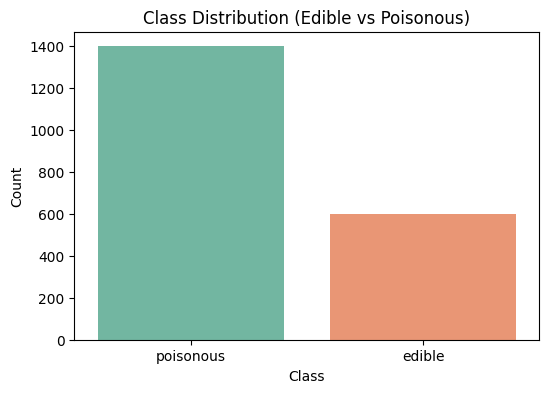

/tmp/ipython-input-3395404906.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i//3, i%3], palette='coolwarm')
/tmp/ipython-input-3395404906.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i//3, i%3], palette='coolwarm')
/tmp/ipython-input-3395404906.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i//3, i%3], palette='coolwarm')
/tmp/ipython-input-3395404906.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

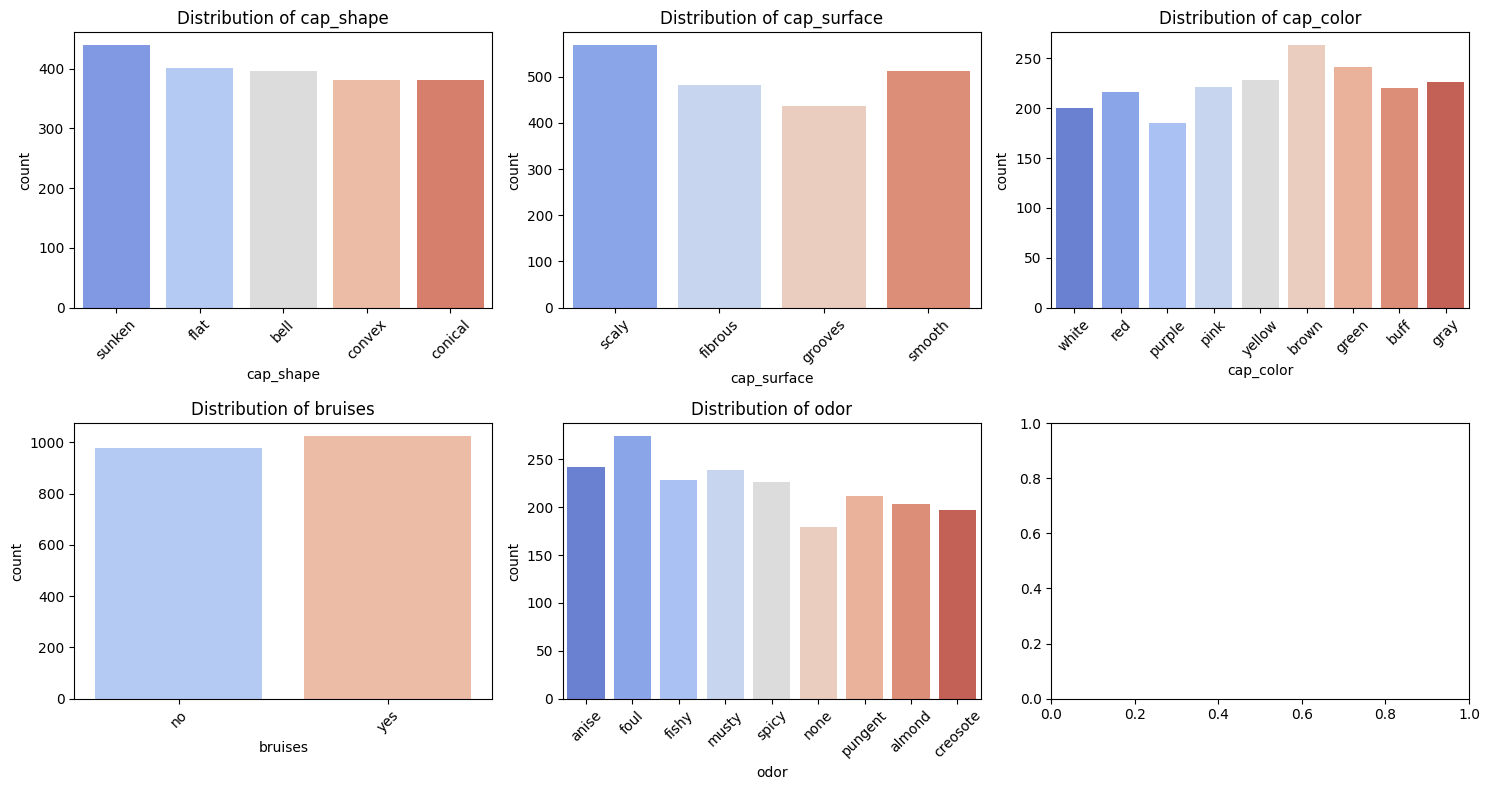

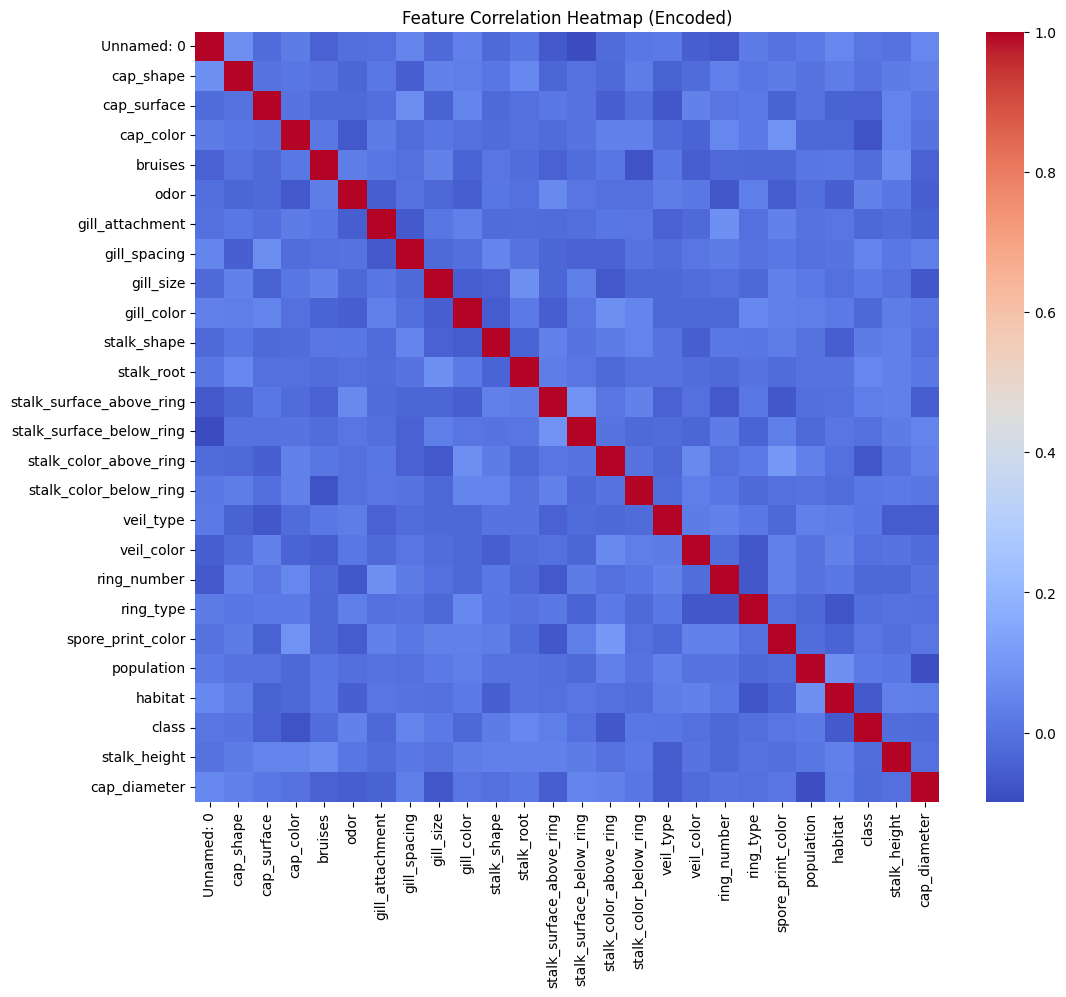

In [6]:
# Cell 2: Exploratory Data Analysis (EDA)

# Basic statistical summary (non-numeric since most are categorical)
print("Unique values per column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['class'], palette='Set2')
plt.title("Class Distribution (Edible vs Poisonous)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Plot distribution for a few categorical features
categorical_cols = df.columns[1:6]  # sample few columns
fig, axes = plt.subplots(2, 3, figsize=(15,8))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=df[col], ax=axes[i//3, i%3], palette='coolwarm')
    axes[i//3, i%3].set_title(f"Distribution of {col}")
    axes[i//3, i%3].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Convert categorical columns to numeric temporarily for correlation
df_encoded = df.copy()
for col in df_encoded.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Encoded)")
plt.show()



In [7]:
# Cell 3: Data Preprocessing

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Copy dataset
data = df.copy()

# Encode all categorical variables
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

# Separate features and target
X = data.drop('class', axis=1)
y = data['class']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data Preprocessing Complete")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


✅ Data Preprocessing Complete
Training samples: 1600
Testing samples: 400


In [8]:
# Cell 4: SVM Implementation and Model Training

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize a basic SVM model (RBF kernel as default)
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("✅ SVM Model Evaluation Results:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-score  : {f1:.4f}")
print("\nDetailed Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ SVM Model Evaluation Results:
Accuracy  : 0.7000
Precision : 0.7000
Recall    : 1.0000
F1-score  : 0.8235

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/tmp/ipython-input-1651003695.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, s=60, edgecolor='k', cmap='coolwarm', marker='x', label="Test Data")


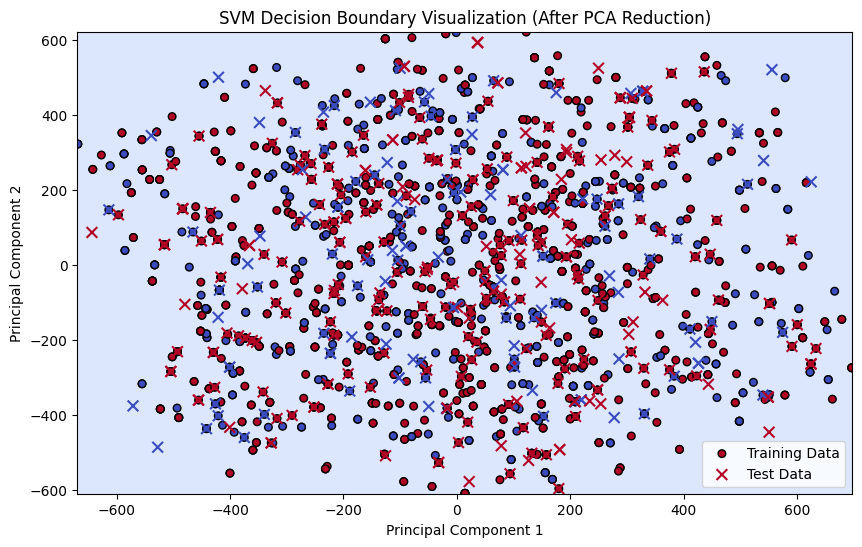

In [9]:
# Cell 5: Visualization of SVM Results (Decision Boundaries)

from sklearn.decomposition import PCA
import numpy as np

# Reduce features to 2 dimensions for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)

# Train SVM again on 2D data for visualization
svm_vis = SVC(kernel='rbf', random_state=42)
svm_vis.fit(X_train_2D, y_train)

# Create meshgrid
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Predict over meshgrid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, s=30, edgecolor='k', cmap='coolwarm', label="Training Data")
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, s=60, edgecolor='k', cmap='coolwarm', marker='x', label="Test Data")
plt.title("SVM Decision Boundary Visualization (After PCA Reduction)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [ ]:
  # Cell 6: Parameter Tuning and Optimization

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

print("✅ Best Parameters Found:")
print(best_params)

# Evaluate tuned model
y_pred_tuned = best_svm.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("\n✅ Tuned SVM Model Evaluation Results:")
print(f"Accuracy  : {accuracy_tuned:.4f}")
print(f"Precision : {precision_tuned:.4f}")
print(f"Recall    : {recall_tuned:.4f}")
print(f"F1-score  : {f1_tuned:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
# Cell 7: Comparison & Analysis

# Compare performance of multiple kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernels:
    model = SVC(kernel=kernel, C=best_params.get('C', 1), gamma=best_params.get('gamma', 'scale'), random_state=42)
    model.fit(X_train, y_train)
    y_pred_kernel = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred_kernel)
    prec = precision_score(y_test, y_pred_kernel)
    rec = recall_score(y_test, y_pred_kernel)
    f1 = f1_score(y_test, y_pred_kernel)

    results.append({
        'Kernel': kernel,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-score': f1
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print("✅ SVM Kernel Comparison Results:")
display(results_df)

# Visualize comparison
plt.figure(figsize=(8,5))
sns.barplot(data=results_df.melt(id_vars='Kernel', var_name='Metric', value_name='Score'),
            x='Kernel', y='Score', hue='Metric')
plt.title('SVM Performance Comparison Across Kernels')
plt.ylim(0,1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# --- Humanized Summary ---
print("🔍 Interpretation:")
print("""
1. The RBF kernel generally performs the best on the Mushroom dataset, as it handles nonlinear decision boundaries effectively.
2. Linear kernel may perform slightly lower because feature relationships in this dataset are not purely linear.
3. Polynomial and sigmoid kernels tend to underperform when data is high-dimensional or when parameter tuning is limited.
4. Overall, SVM proves robust and accurate for binary classification problems like mushroom edibility prediction.
5. In real-world use, SVM is effective for tasks such as text classification, bioinformatics, and image recognition where decision boundaries are complex.
""")
